In [4]:
import numpy as np
import matplotlib.pyplot as plt


array([ 9.27387276e-04, -2.74801415e-04, -3.17183457e-05])

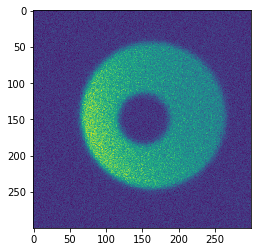

In [ ]:
donut2=np.load('/astro/users/driemann/auxtel_aos/data/intrafocal0_donut8.npz')
plt.imshow(donut2['image'])
donut2['dof']

In [ ]:
donut2['dof']

array([-9.81744066e-04, -4.28993923e-04, -1.01136799e-05, -1.74642838e-05,
       -2.25683489e-05])

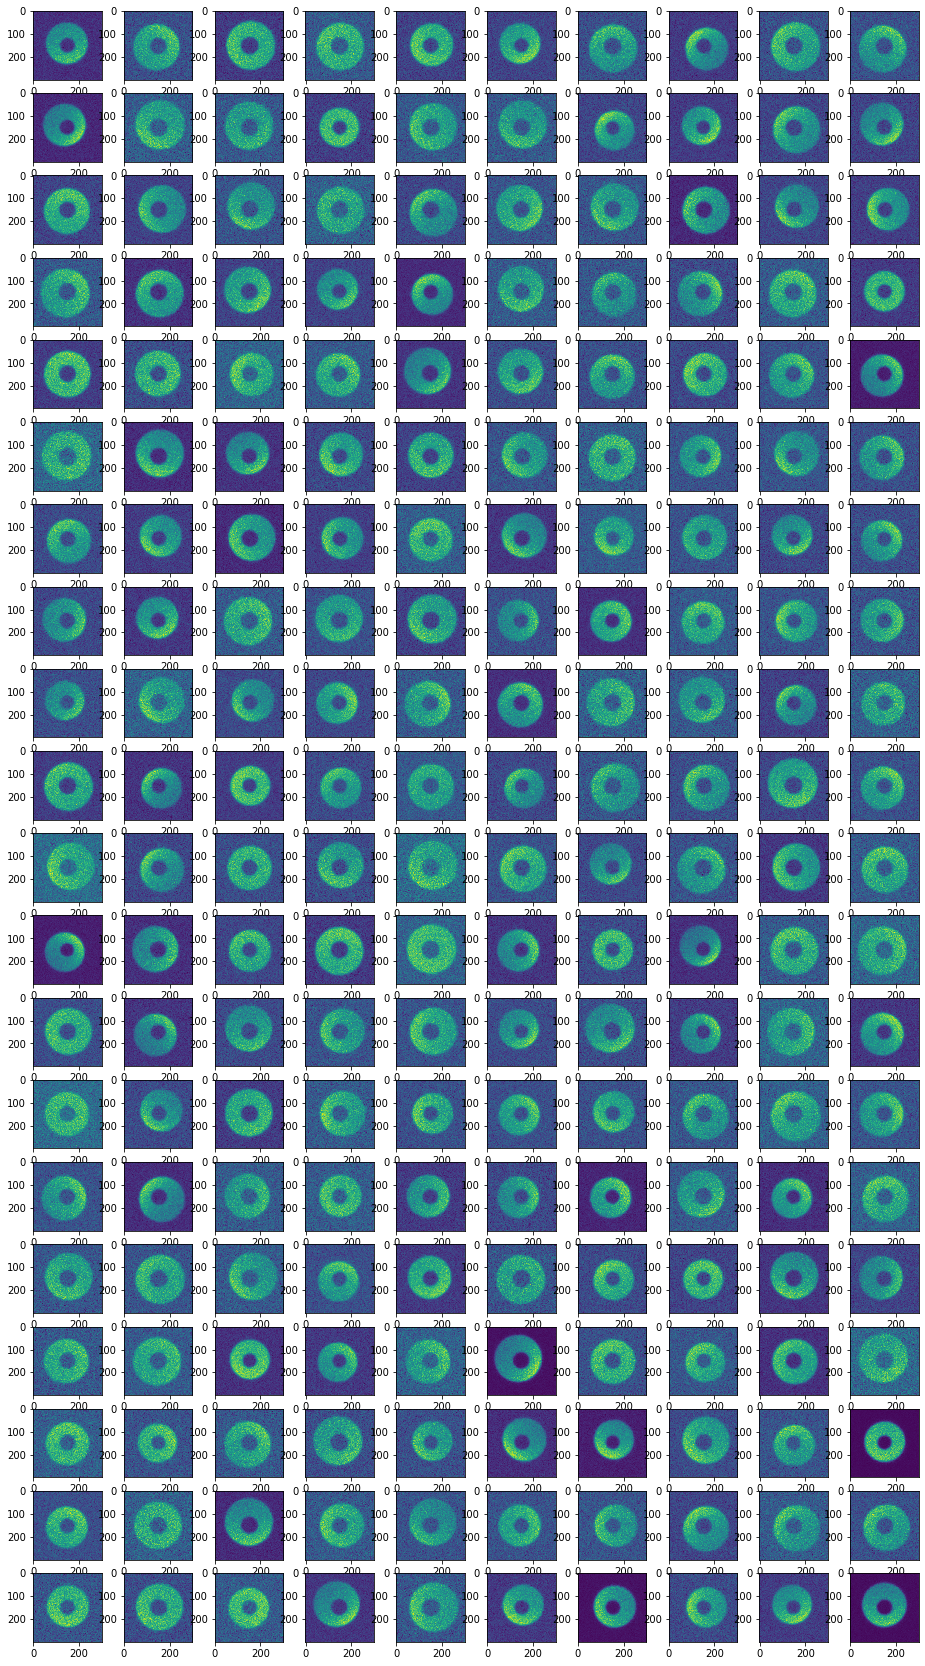

In [ ]:
fig, axes = plt.subplots(20, 10, figsize=(16, 30))

for i, ax in enumerate(axes.flatten()):
    
    donut=np.load(f'../data/extrafocal1_donut{i}.npz')
    ax.imshow(donut['image'])

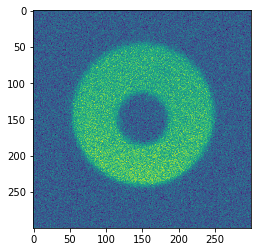

In [ ]:
plt.imshow(donut2['image'])

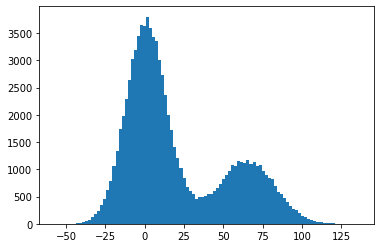

In [ ]:
plt.hist(donut2['image'].flatten(), bins=100);

In [ ]:
plt.imshow(donut3['image'])

NameError: name 'donut3' is not defined

In [ ]:
import glob
from typing import Any, Dict, Tuple
import numpy as np
import torch
from astropy.table import Table
from torch.utils.data import Dataset

In [ ]:
class Idk:
 
    def __init__(
        self,
        mode: str = "train",
        nval: int = 256,
        ntest: int = 2 ** 10,
        data_dir: str = "../data",
        **kwargs: Any,
    ) -> None:
        
        data_files = glob.glob(f"{data_dir}/*")
        rng = np.random.default_rng(0)
        rng.shuffle(data_files)
        
        test_set = data_files[-ntest:]
        rest=data_files[:-ntest]
        
        val_set = rest[-nval:]
        train_set=rest[:-nval]
              
        if mode == "train":
            self._data_files = train_set
        elif mode == "val":
            self._data_files = val_set
        elif mode == "test":
            self._data_files = test_set
            
    def __len__(self) -> int:
        return len(self._data_files)

    def __getitem__(self, idx: int) -> Dict[str, torch.Tensor]:
         # get the image file
        data_file = self._data_files[idx]

        # load the image
        data = np.load(data_file)
        
        image = data['image'][None, :, :]
        intrafocal = 0 if "flip" in data_file.split("/")[-1] else 1
        dof=np.concatenate((data['Translation'], data['Rotation'].flatten()))
        
        output= {
            "image": torch.from_numpy(image).float(),
            "intrafocal": torch.FloatTensor([intrafocal]),
            "dof": torch.from_numpy(dof).float()
        }
        
        return output

In [ ]:
data_dir: str = "../data"
data_file = glob.glob(f"{data_dir}/*")[0]
data = np.load(data_file)

In [ ]:
image = data['image'][None, :, :]
intrafocal = 0 if "flip" in data_file.split("/")[-1] else 1
dof=np.concatenate((data['Translation'], data['Rotation'].flatten()))

KeyError: 'Translation is not a file in the archive'

In [ ]:
data['Translation'], data['Rotation'].flatten()

(array([ 8.29224405e-05, -4.00576219e-04, -8.15462556e-04]),
 array([ 1.00000000e+00,  0.00000000e+00, -2.18583129e-05,  5.99819412e-10,
         1.00000000e+00,  2.74412492e-05,  2.18583129e-05, -2.74412492e-05,
         9.99999999e-01]))

In [ ]:
idk = Idk(mode="test")

In [ ]:
len(idk)

1024

In [ ]:
for img in idk:
    break

In [ ]:
list(img.keys())

['image', 'intrafocal', 'dof']

In [ ]:
img

{'image': tensor([[[ -0.3353,  -5.8024,   7.2764,  ...,  15.1558,   6.0148, -10.4752],
          [-13.4209,  -2.3108,   3.4326,  ...,  -7.4783,   2.5334,   0.2335],
          [ -9.3071,   2.9033,  -3.6162,  ...,   7.5206,  -0.8171,  -8.8510],
          ...,
          [ -2.9938,  -4.1177,   6.7840,  ...,   6.0194, -10.0041,  10.1123],
          [ -2.3259,  -5.1248, -11.6139,  ..., -11.5506,   2.0696,   1.3760],
          [  9.9533,   0.8046,  -2.9508,  ...,  -2.6197,  -4.9199,   5.7020]]]),
 'intrafocal': tensor([1.]),
 'dof': tensor([ 4.1079e-04, -5.4429e-04, -7.4903e-04,  1.0000e+00,  0.0000e+00,
         -2.2393e-05,  6.1030e-10,  1.0000e+00,  2.7254e-05,  2.2393e-05,
         -2.7254e-05,  1.0000e+00])}

In [ ]:
testing=idk(mode)

NameError: name 'mode' is not defined

In [ ]:
test=idk("dominik",100)

NameError: name 'rest' is not defined

In [ ]:
donut2=np.load(str(test.data_dir)+"/testing_data0.npz")

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class ExampleDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]

# create data and labels
data = [1, 2, 3, 4, 5]
labels = [1, 0, 1, 0, 1]

# create dataset object
dataset = ExampleDataset(data, labels)

# create data loader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# access data in the data loader
for data, label in dataloader:
    print(data, label)

tensor([3, 1]) tensor([1, 1])
tensor([4, 5]) tensor([0, 1])
tensor([2]) tensor([0])


In [ ]:
from lightning.py import WaveNet

ModuleNotFoundError: No module named 'lightning'

In [ ]:
from ml_aos.dataloader import DavidsDonuts as Donuts

ModuleNotFoundError: No module named 'ml_aos'

In [ ]:
import auxtel_aos

ModuleNotFoundError: No module named 'auxtel_aos'

In [ ]:
model=WaveNet.load